<a href="https://colab.research.google.com/github/sudislife/Google-Stock-Price-Prediction-Using-Simple-RNN/blob/main/Google_Stock_Price_Prediction_Using_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the data

In [1]:
import pandas as pd

google_stock = pd.read_csv('https://raw.githubusercontent.com/sudislife/Google-Stock-Price-Prediction-Using-Simple-RNN/main/GOOG.csv')

In [2]:
google_stock_before_21 = google_stock.loc[pd.DatetimeIndex(google_stock['Date']).year < 2021]
google_stock_during_21 = google_stock.loc[pd.DatetimeIndex(google_stock['Date']).year == 2021]
google_stock_train = pd.concat((google_stock_before_21, google_stock_during_21.loc[pd.DatetimeIndex(google_stock_during_21['Date']).month < 7]), axis=0)
google_stock_test = google_stock_during_21.loc[pd.DatetimeIndex(google_stock_during_21['Date']).month == 7]

In [ ]:
google_stock_train['Date'] = pd.to_datetime(google_stock_train['Date'])
google_stock_test['Date'] = pd.to_datetime(google_stock_test['Date'])

In [5]:
print('Shape of google stock train:', google_stock_train.shape)
print('Shape of google stock test:', google_stock_test.shape)

Shape of google stock train: (4245, 7)
Shape of google stock test: (11, 7)


In [14]:
google_stock_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
1,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
2,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
3,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276
4,2004-08-26,52.279045,53.773445,52.134586,53.753517,53.753517,7128620


In [15]:
google_stock_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
4245,2021-07-01,2496.995117,2529.250000,2496.995117,2527.370117,2527.370117,856000
4246,2021-07-02,2536.790039,2576.959961,2535.379883,2574.379883,2574.379883,1058000
4247,2021-07-06,2588.989990,2597.689941,2568.179932,2595.419922,2595.419922,1067500
4248,2021-07-07,2606.820068,2612.798096,2595.199951,2601.550049,2601.550049,834000
4249,2021-07-08,2565.000000,2600.649902,2560.800049,2583.540039,2583.540039,989000


In [6]:
google_stock_train['Date'].max()

Timestamp('2021-06-30 00:00:00')

In [16]:
google_stock_test['Date'].max()

Timestamp('2021-07-16 00:00:00')

## Visualizing the data

Google Stock's Opening Price used in Training Data

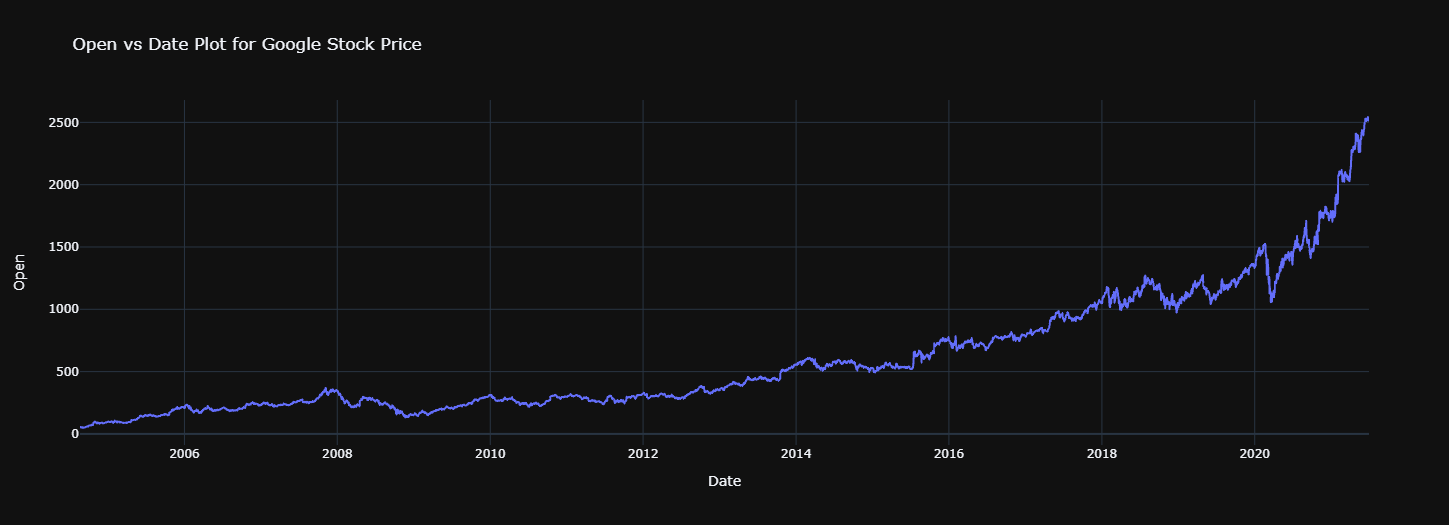

Google Stock's Opening Price used in Tseting Data

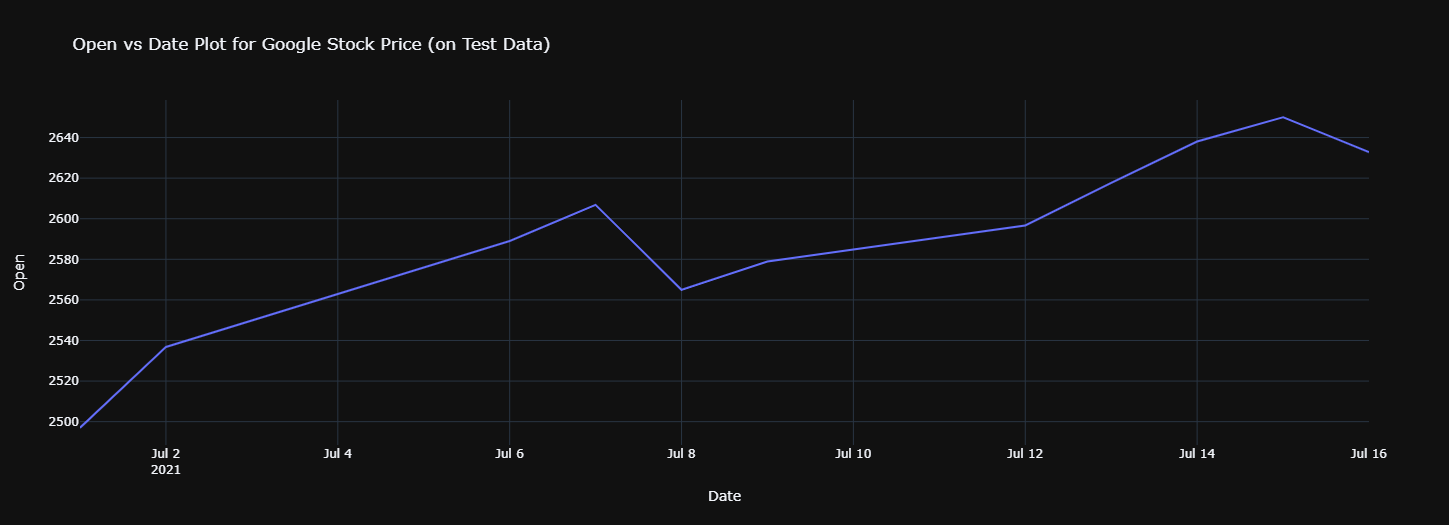

In [ ]:
google_stock_train.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
import plotly.express as px

fig = px.line(
    google_stock_train, 
    x='Date', 
    y='Open', 
    title='Open vs Date Plot for Google Stock Price',
    template='plotly_dark'
)
fig.show()

In [9]:
import plotly.express as px

fig = px.line(
    google_stock_test, 
    x='Date', 
    y='Open', 
    title='Open vs Date Plot for Google Stock Price (on Test Data)',
    template='plotly_dark'
)
fig.show()

## Feature Scaling 

In [4]:
training_set = google_stock_train['Open'].values.reshape(-1, 1)
training_set

array([[  50.316402],
       [  55.168217],
       [  55.4123  ],
       ...,
       [2540.      ],
       [2535.449951],
       [2513.071045]])

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Using Normalization over here because Standardization doesn't work here (find out why later)
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[3.63854179e-04],
       [2.31107590e-03],
       [2.40903589e-03],
       ...,
       [9.99570540e-01],
       [9.97744429e-01],
       [9.88762905e-01]])

In [6]:
X_train = []
y_train = []
for i in range(120, google_stock_train.shape[0]):
  X_train.append(training_set_scaled[i-120:i, 0])
  y_train.append(training_set_scaled[i, 0])

In [7]:
import numpy as np

X_train = np.array(X_train)
y_train = np.array(y_train)

In [14]:
X_train.shape

(4125, 120)

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_train.shape

(4061, 60, 1)

## Building the RNN

Loss over 100 epochs

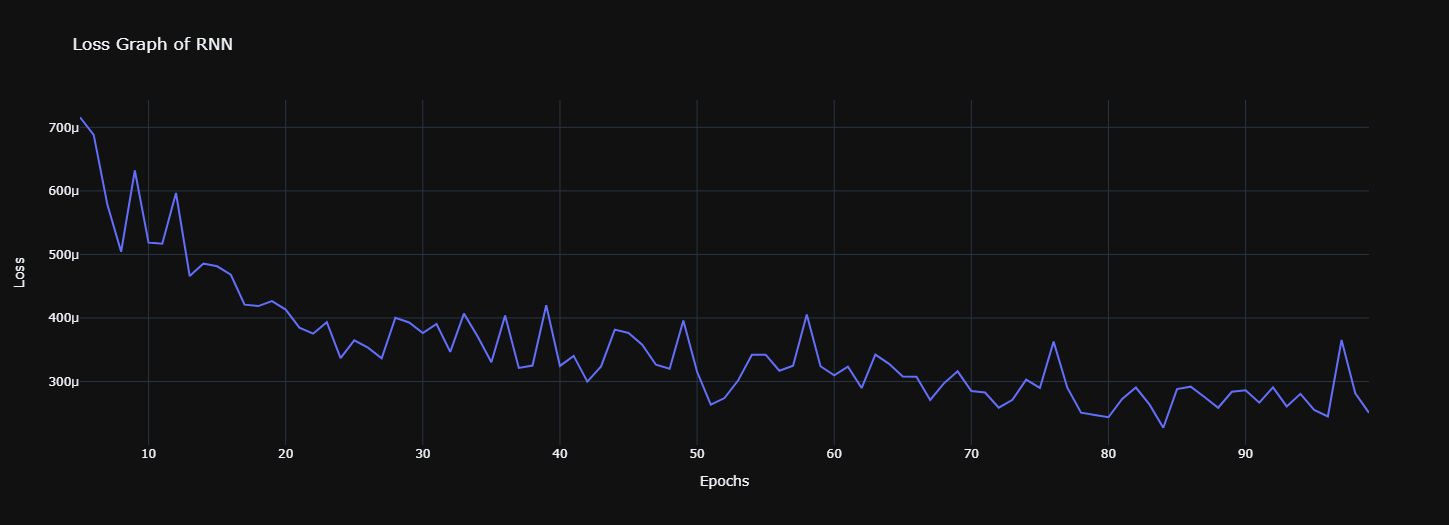

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [10]:
LSTM_Model = Sequential()

# Adding the first LSTM layer and some Dropout regularization
LSTM_Model.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
LSTM_Model.add(Dropout(0.2))
LSTM_Model.add(LSTM(100, return_sequences=True))
LSTM_Model.add(Dropout(0.2))
LSTM_Model.add(LSTM(100, return_sequences=True))
LSTM_Model.add(Dropout(0.2))
LSTM_Model.add(LSTM(100))
LSTM_Model.add(Dropout(0.2))
LSTM_Model.add(Dense(1))
LSTM_Model.compile(optimizer='adam', loss='mean_squared_error')
model = None
model = LSTM_Model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
129/129 [==============================] - 14s 25ms/step - loss: 0.0031
Epoch 2/100
129/129 [==============================] - 3s 24ms/step - loss: 8.1826e-04
Epoch 3/100
129/129 [==============================] - 3s 24ms/step - loss: 9.5441e-04
Epoch 4/100
129/129 [==============================] - 3s 24ms/step - loss: 6.9093e-04
Epoch 5/100
129/129 [==============================] - 3s 24ms/step - loss: 7.7752e-04
Epoch 6/100
129/129 [==============================] - 3s 24ms/step - loss: 7.1583e-04
Epoch 7/100
129/129 [==============================] - 3s 23ms/step - loss: 6.8820e-04
Epoch 8/100
129/129 [==============================] - 3s 23ms/step - loss: 5.7796e-04
Epoch 9/100
129/129 [==============================] - 3s 24ms/step - loss: 5.0417e-04
Epoch 10/100
129/129 [==============================] - 3s 24ms/step - loss: 6.3212e-04
Epoch 11/100
129/129 [==============================] - 3s 23ms/step - loss: 5.1861e-04
Epoch 12/100
129/129 [======================

In [11]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x = np.arange(5, 100), y = model.history['loss'][5:], name = 'Loss in training data'))
fig.update_layout(title = 'Loss Graph of RNN', template='plotly_dark')
fig.update_xaxes(title_text='Epochs')
fig.update_yaxes(title_text='Loss')
fig.show()

In [ ]:
LSTM_Model.save('LSTM_Model_of_Google')

## Making the predictions and visualizing the results

Comparing to actual values, last value is manually inserted and is wrong

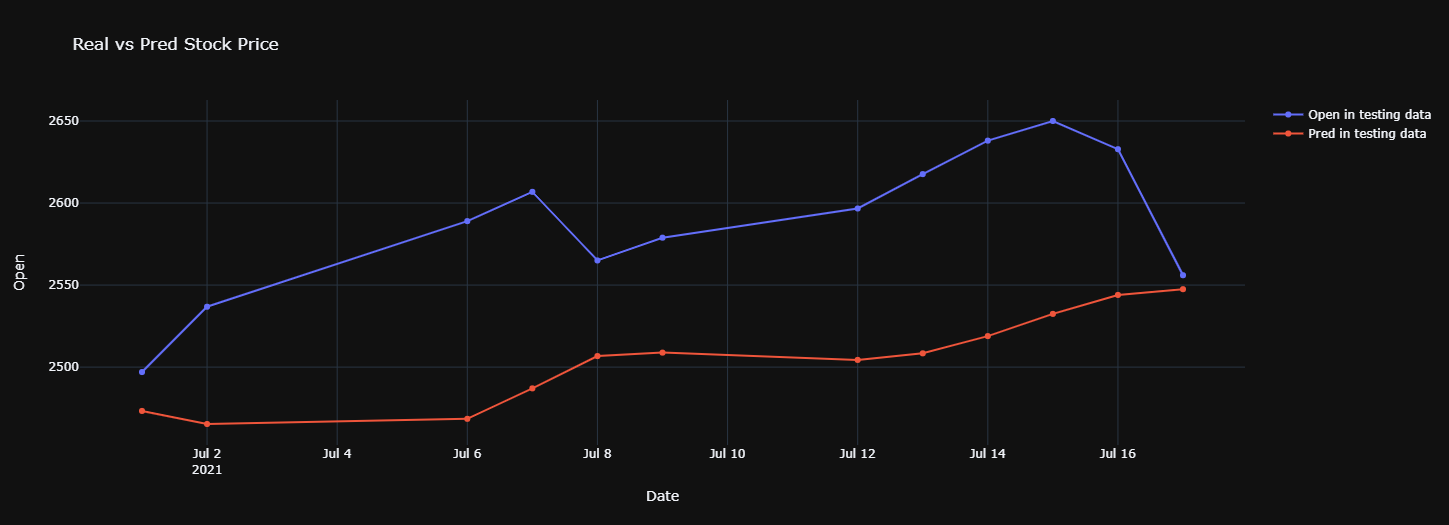

In [ ]:
google_stock_test.loc[len(google_stock_test.index)] = ['2021-07-17 00:00:00', 0, 0, 0, 0, 0, 0]
total_set = pd.concat((google_stock_train['Open'], google_stock_test['Open']), axis=0)
inputs = total_set[total_set.shape[0] - google_stock_test.shape[0] - 120:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

In [18]:
google_stock_test.shape

(12, 7)

In [20]:
X_test = []
y_test = []
for i in range(120, 120 + google_stock_test.shape[0]):
  X_test.append(inputs[i-120:i, 0])
  y_test.append(inputs[i, 0])

In [21]:
import numpy as np

X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
X_test.shape

(33, 60)

In [23]:
X_test = np.reshape(X_test, (X_test.shape[0], 120, 1))

In [24]:
predicted_test_stock = LSTM_Model.predict(X_test)
predicted_test_stock = sc.inverse_transform(predicted_test_stock)

In [25]:
pred_test = np.reshape(predicted_test_stock, (predicted_test_stock.shape[0]))

In [ ]:
google_stock_test['Pred'] = pred_test

In [ ]:
google_stock_test.loc[google_stock_test['Open'] == 0, 'Open'] = 2556

In [29]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x = google_stock_test['Date'], y = google_stock_test['Open'], name = 'Open in testing data'))
fig.add_trace(go.Scatter(x = google_stock_test['Date'], y = google_stock_test['Pred'], name = 'Pred in testing data'))
fig.update_layout(title = 'Real vs Pred Stock Price ', template='plotly_dark')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Open')
fig.show()

## Evaulating the RNN

Average of Open: 603.297

RMSE: 94.9614

In [38]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(google_stock_test['Open'][0:google_stock_test.shape[0]-1], google_stock_test['Pred'][0:google_stock_test.shape[0]-1]))

In [34]:
print('Average of Open', total_set.mean())

Average of Open 603.2968255752871


In [39]:
print('RMSE: ', rmse)

RMSE:  94.96141156749785
